In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata
import scipy

import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import session_info
session_info.show()

In [3]:
sc.settings.set_figure_params(dpi=80)

In [4]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

# Read in original adata

In [5]:
!ls /nfs/team205/heart/anndata_objects/Foetal/trisomy21

archive_ArchR
ArchR
AtlasT21IntegratedRaw.h5ad
AtlasT21IntegratedRaw.obs.csv
AtlasT21ToFIntegratedRaw.h5ad
CellTypist_labelling
Euploid_T21Hearts_Aug2024_sel.h5ad
Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor.h5ad
Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor.obs.csv
Euploid_T21Hearts_July2024_sel_subsampled-donor-10000.h5ad
Euploid_T21Hearts_July2024_sel_subsampled-donor-10000.obs.csv
Euploid_T21Hearts_July2024_sel_subsampled-donor-10000_pseudobulked.h5ad
Euploid_T21Hearts_July2024_sel_subsampled-donor-10000_pseudobulked-perdonor-sum.h5ad
Euploid_T21Hearts_July2024_sel_subsampled-donor-10000_pseudobulked-sum.h5ad
T21-Healthy_RNA_raw_forArchR.h5ad
T21-Healthy_RNA_raw_forArchR.rds
T21Hearts_cleaned_July2024.h5ad
T21Hearts_cleaned_July2024.obs.csv
T21HeartsExtracardiacRemovedIntegratedProcessed.h5ad
T21HeartsExtracardiacRemovedRaw.h5ad
T21HeartsExtracardiacRemovedRaw.obs.csv
T21Hearts_July2024.h5ad


In [6]:
# atlas
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/trisomy21/Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor.h5ad')
adata

AnnData object with n_obs × n_vars = 83477 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'region', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', 'FACSgate', 'fine_grain', 'mid_grain', 'coarse_grain', 'sex', 'week', 'trimester', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', '_scvi_labels', 'stress_score', 'hb1_score', 'euploid_or_t21', 'donor_type', 'region_finest', 'flushed', 'scrublet_leiden', 'cluster_scrublet_score', 'leiden_scVI_0.1', 'leiden

# Add scVI latent space

In [9]:
latent_file_name_list = os.listdir('/nfs/team205/heart/anndata_objects/Foetal/scVI/latent_variables')
latent_file_name_list = [x.split('.h5ad')[0] for x in latent_file_name_list if (x!='archive')&('subsampled-per-cellstate-donor_' in x)]
latent_file_name_list

['Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-region_n-layers-2',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-donor-region_n-layers-3',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-donor-region_n-layers-2',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-donor_n-layers-2',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-donor_n-layers-1',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-donor-region_n-layers-1',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-region_n-layers-1',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-region_n-layers-3',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-donor_n-layers-3']

In [10]:
for latent_file_name in latent_file_name_list:
    latent_space_condition = latent_file_name.split('subsampled-per-cellstate-donor_')[1]
    latent = sc.read_h5ad(f'/nfs/team205/heart/anndata_objects/Foetal/scVI/latent_variables/{latent_file_name}.h5ad')
    # add latent space
    adata.obsm[f'scVI_latent_{latent_space_condition}']=latent.X.copy()

In [11]:
adata

AnnData object with n_obs × n_vars = 83477 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'region', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', 'FACSgate', 'fine_grain', 'mid_grain', 'coarse_grain', 'sex', 'week', 'trimester', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', '_scvi_labels', 'stress_score', 'hb1_score', 'euploid_or_t21', 'donor_type', 'region_finest', 'flushed', 'scrublet_leiden', 'cluster_scrublet_score', 'leiden_scVI_0.1', 'leiden

# Find neighbors, UMAP/Clustering

In [12]:
latent_file_name_list.sort()
latent_file_name_list

['Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-donor-region_n-layers-1',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-donor-region_n-layers-2',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-donor-region_n-layers-3',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-donor_n-layers-1',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-donor_n-layers-2',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-donor_n-layers-3',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-region_n-layers-1',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-region_n-layers-2',
 'Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor_correcting-region_n-layers-3']

##### correcting-donor-region_n-layers-1 #####


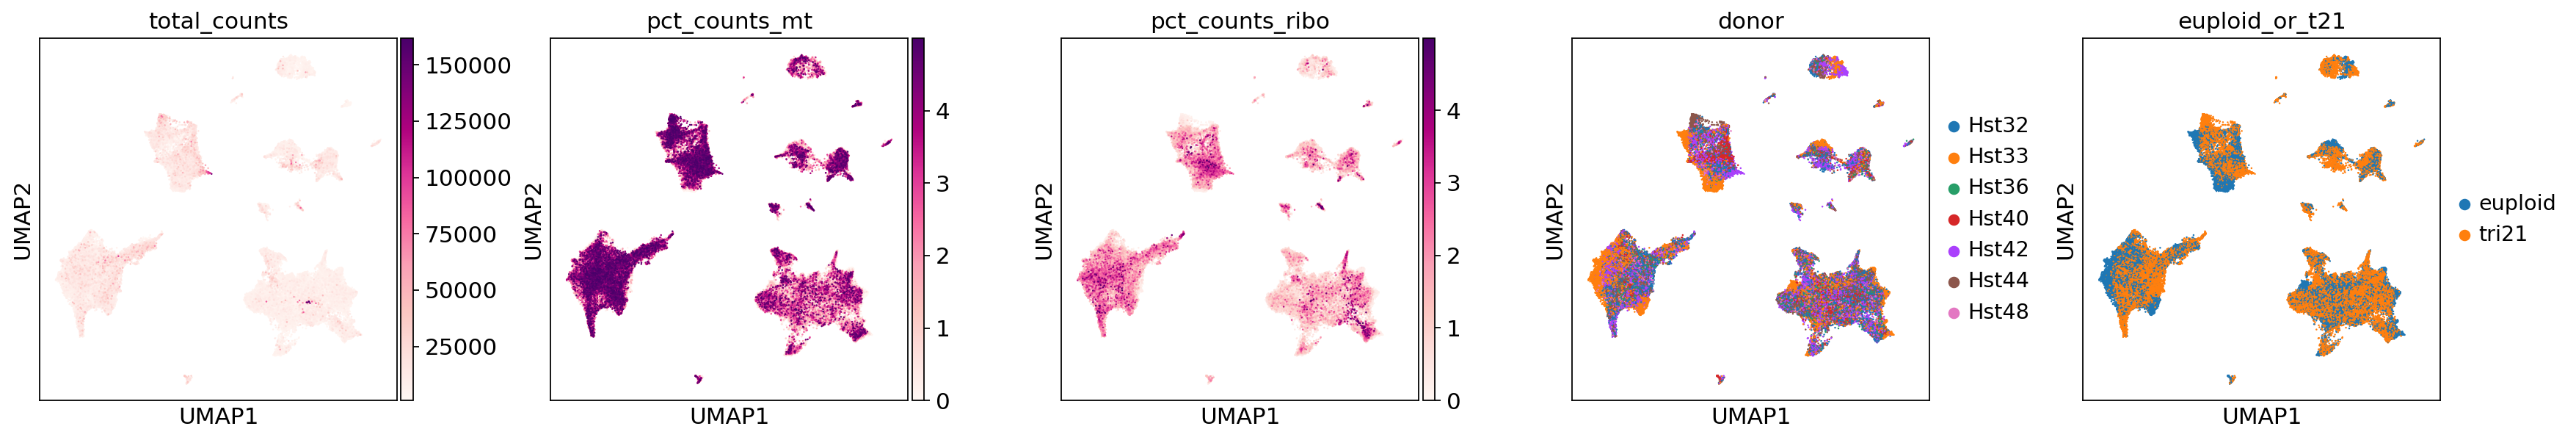



##### correcting-donor-region_n-layers-2 #####


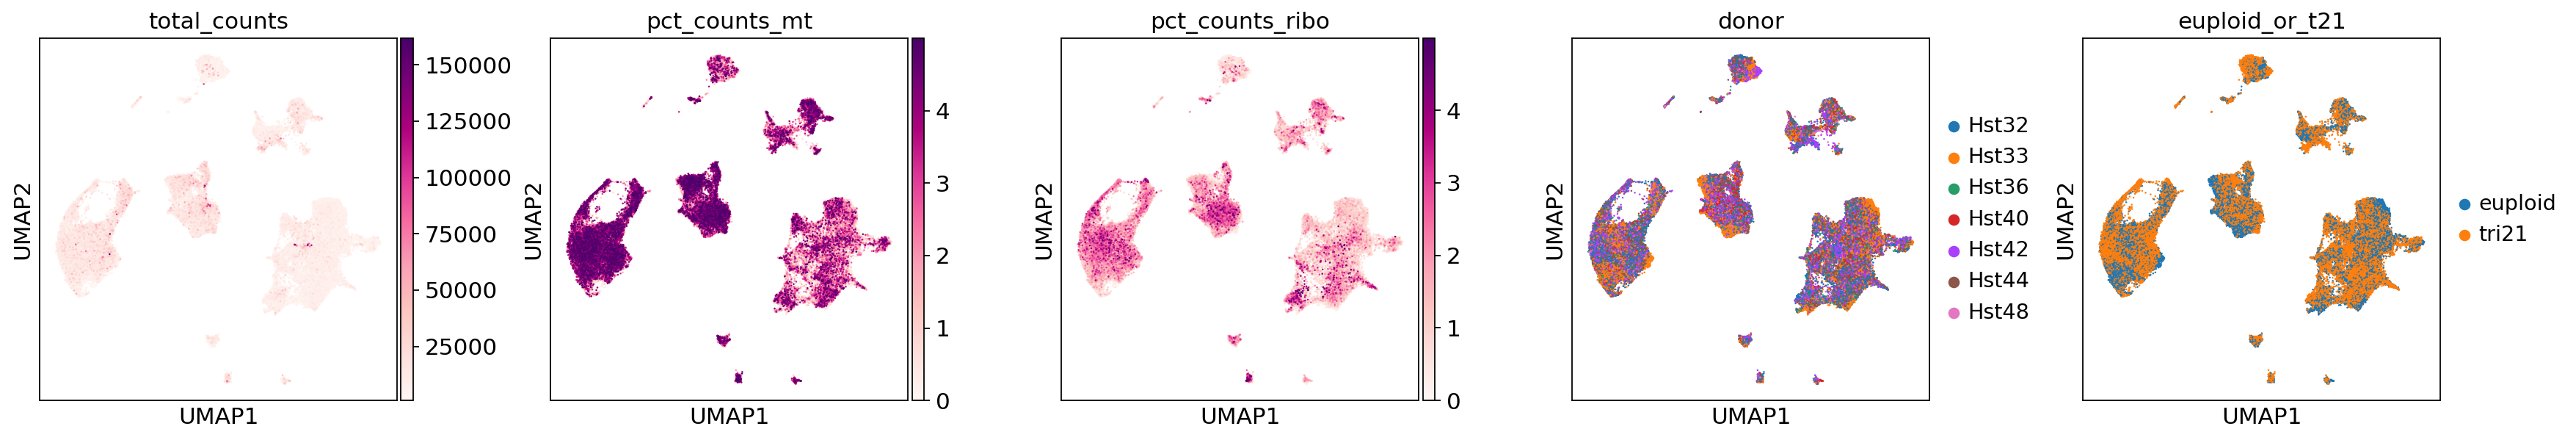



##### correcting-donor-region_n-layers-3 #####


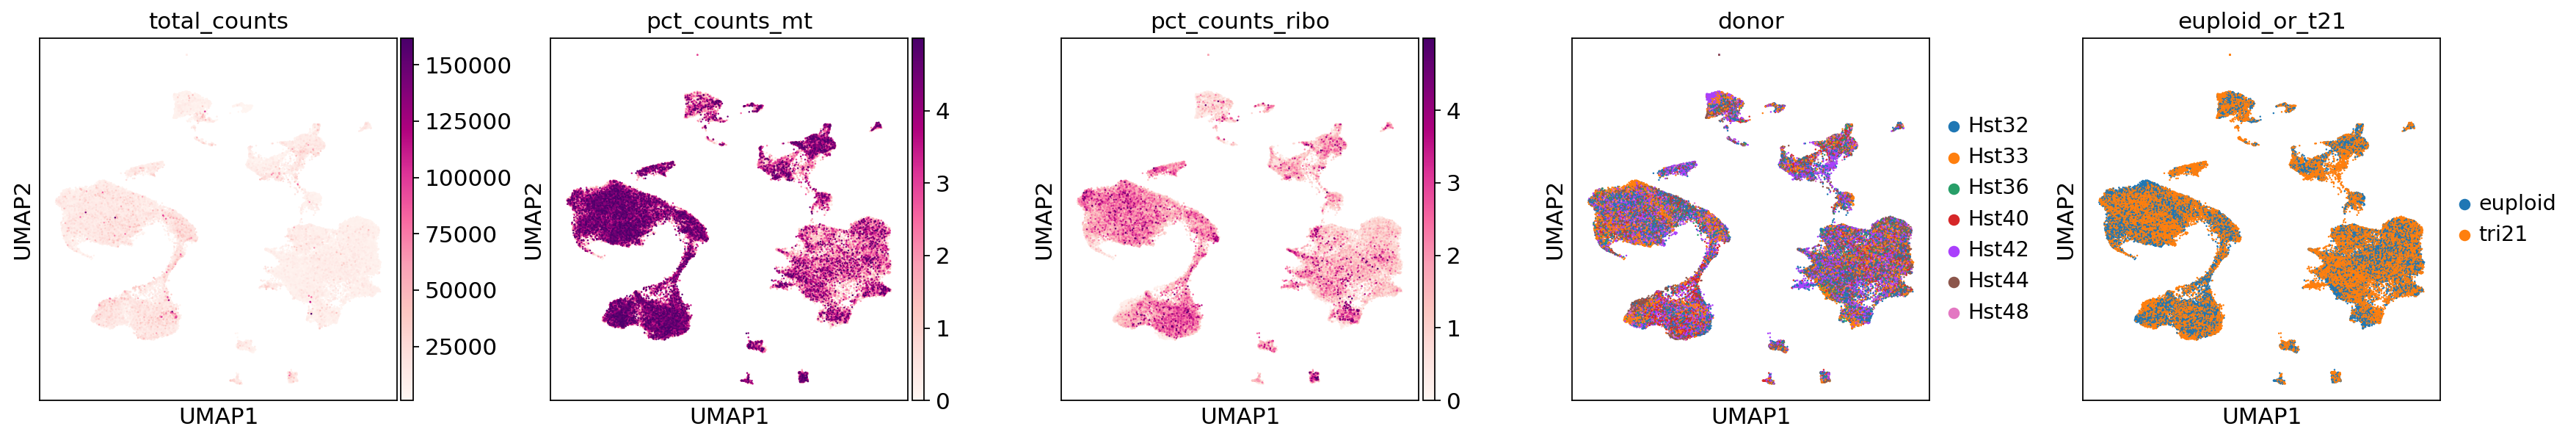



##### correcting-donor_n-layers-1 #####


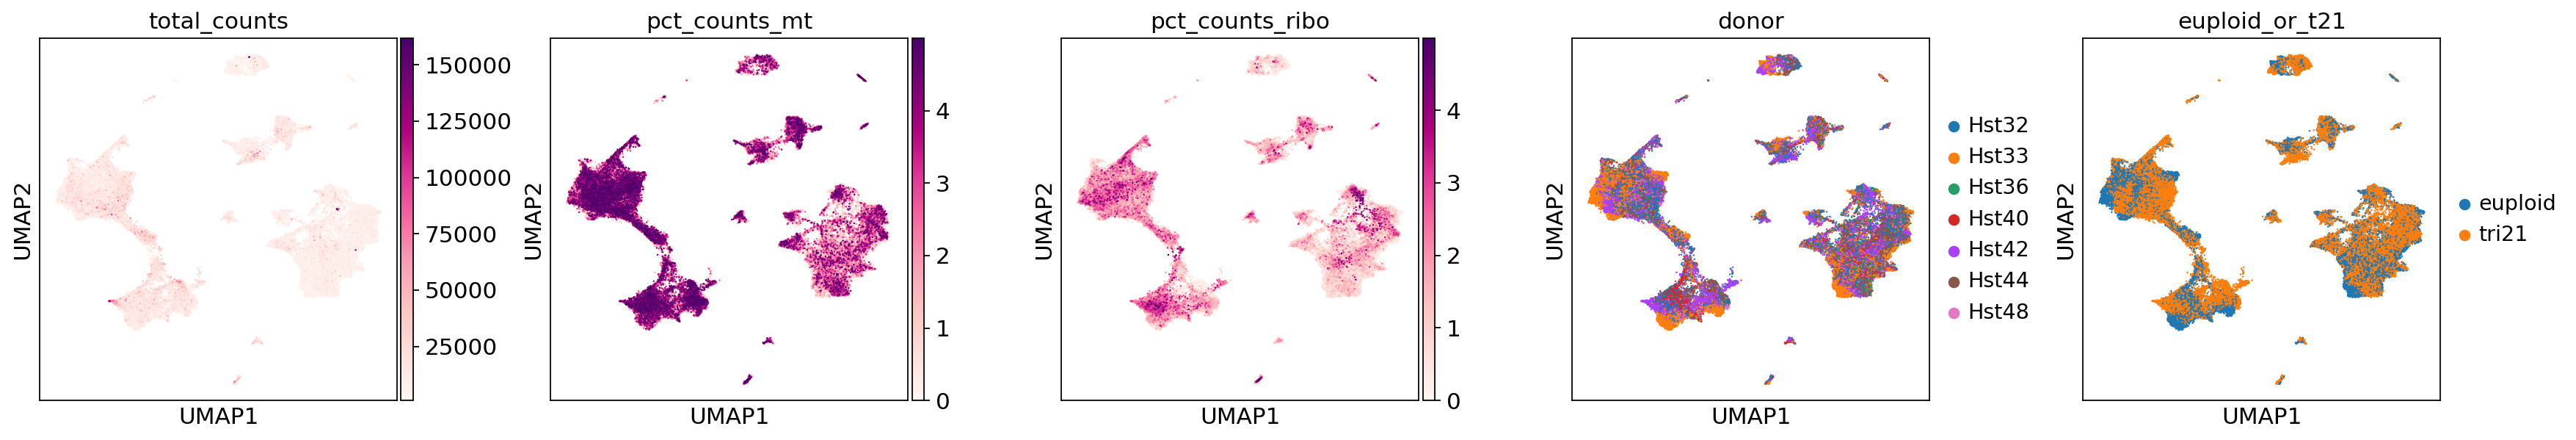



##### correcting-donor_n-layers-2 #####


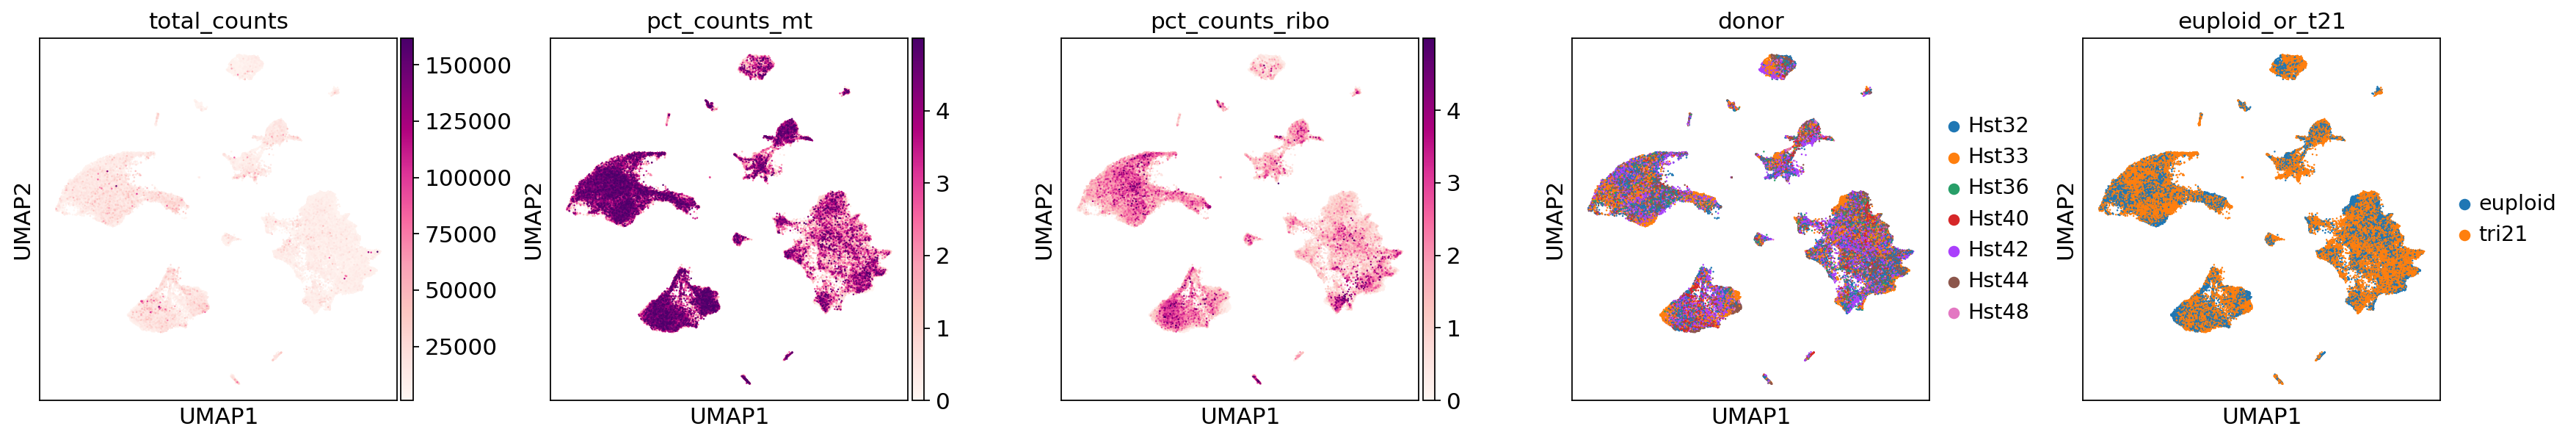



##### correcting-donor_n-layers-3 #####


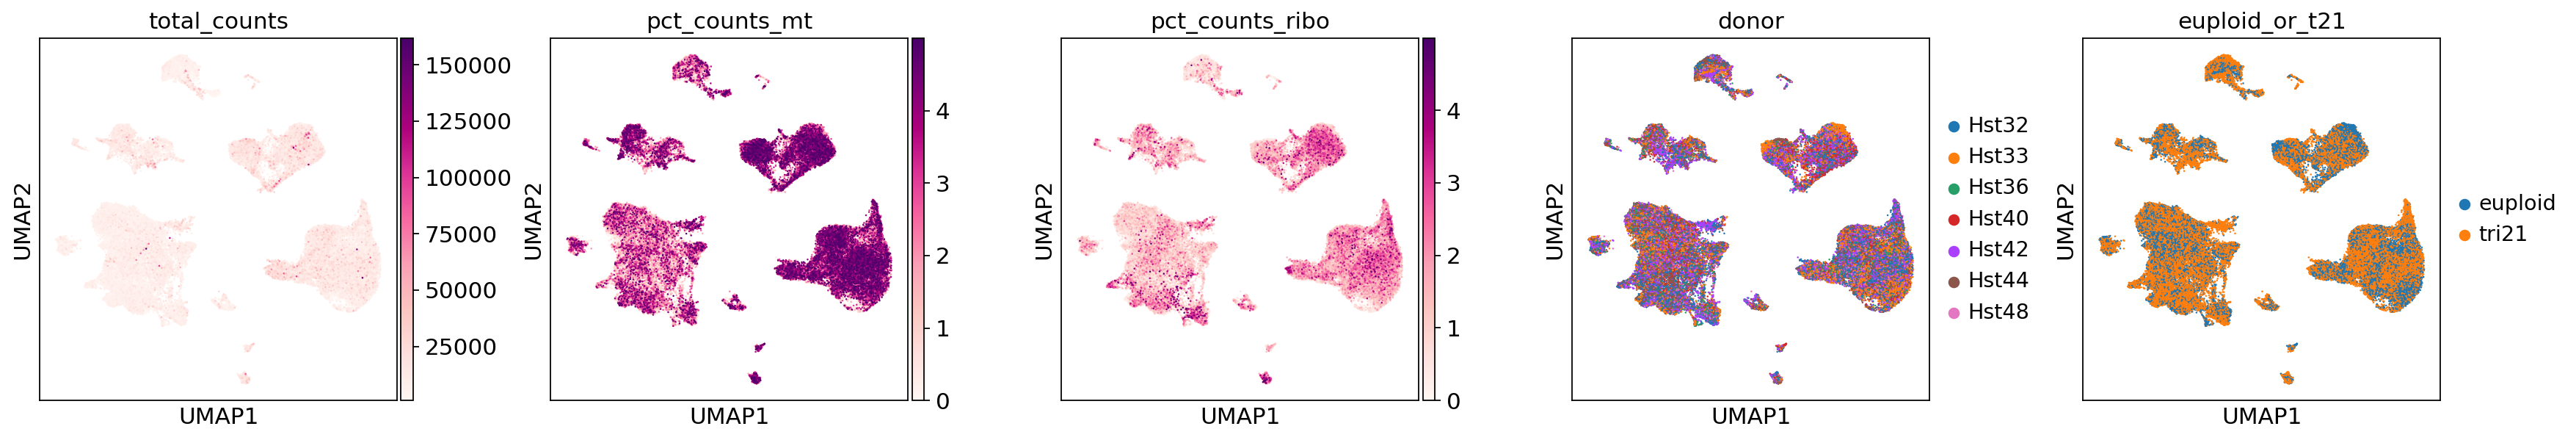



##### correcting-region_n-layers-1 #####


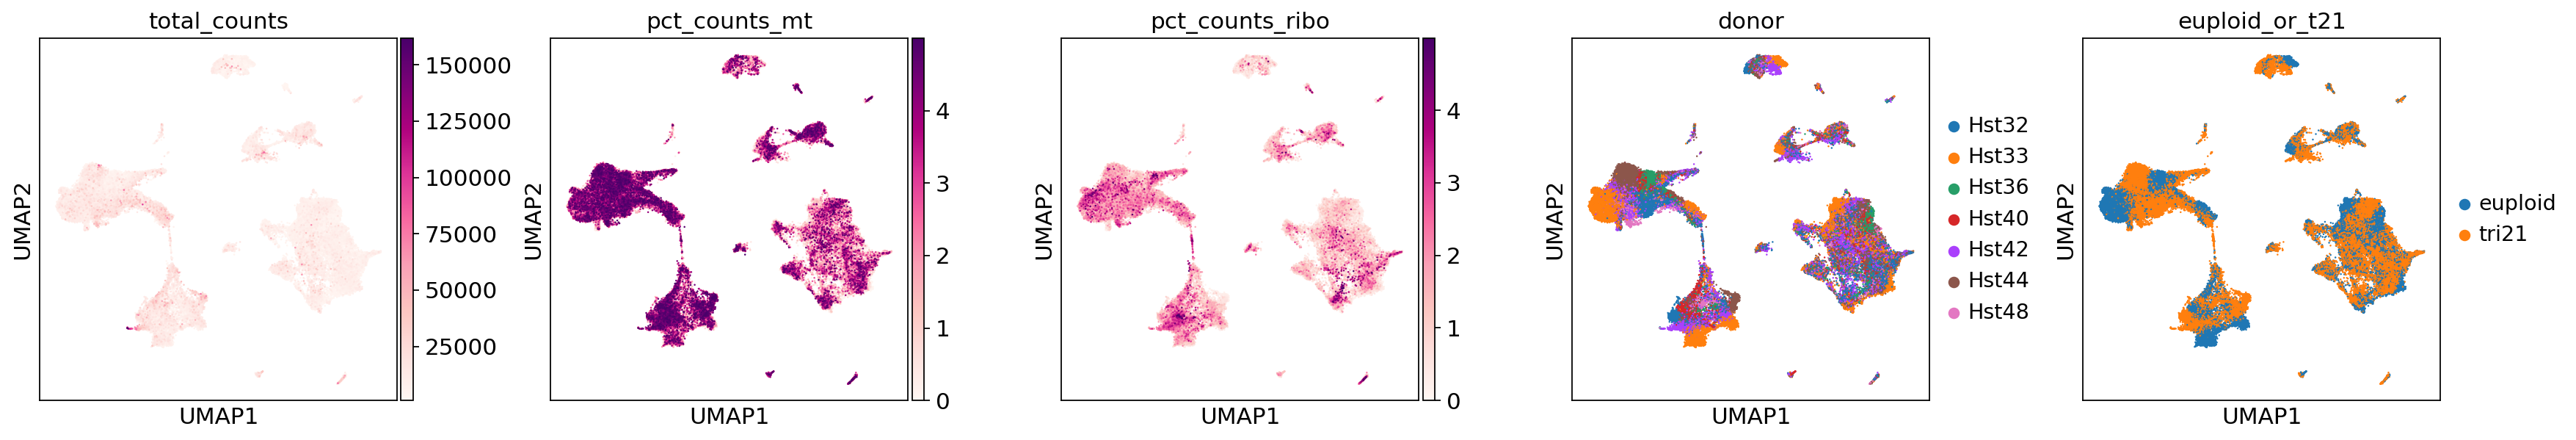



##### correcting-region_n-layers-2 #####


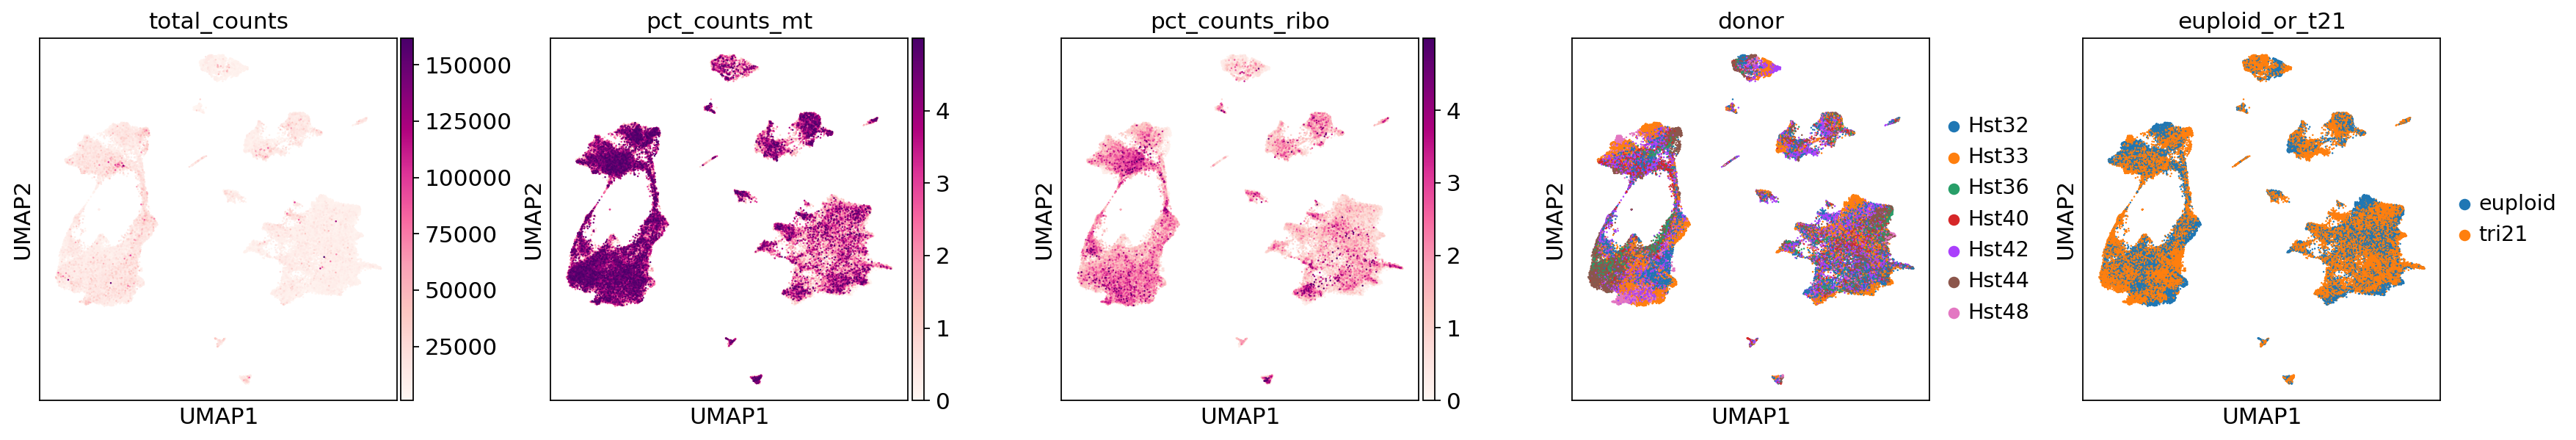



##### correcting-region_n-layers-3 #####


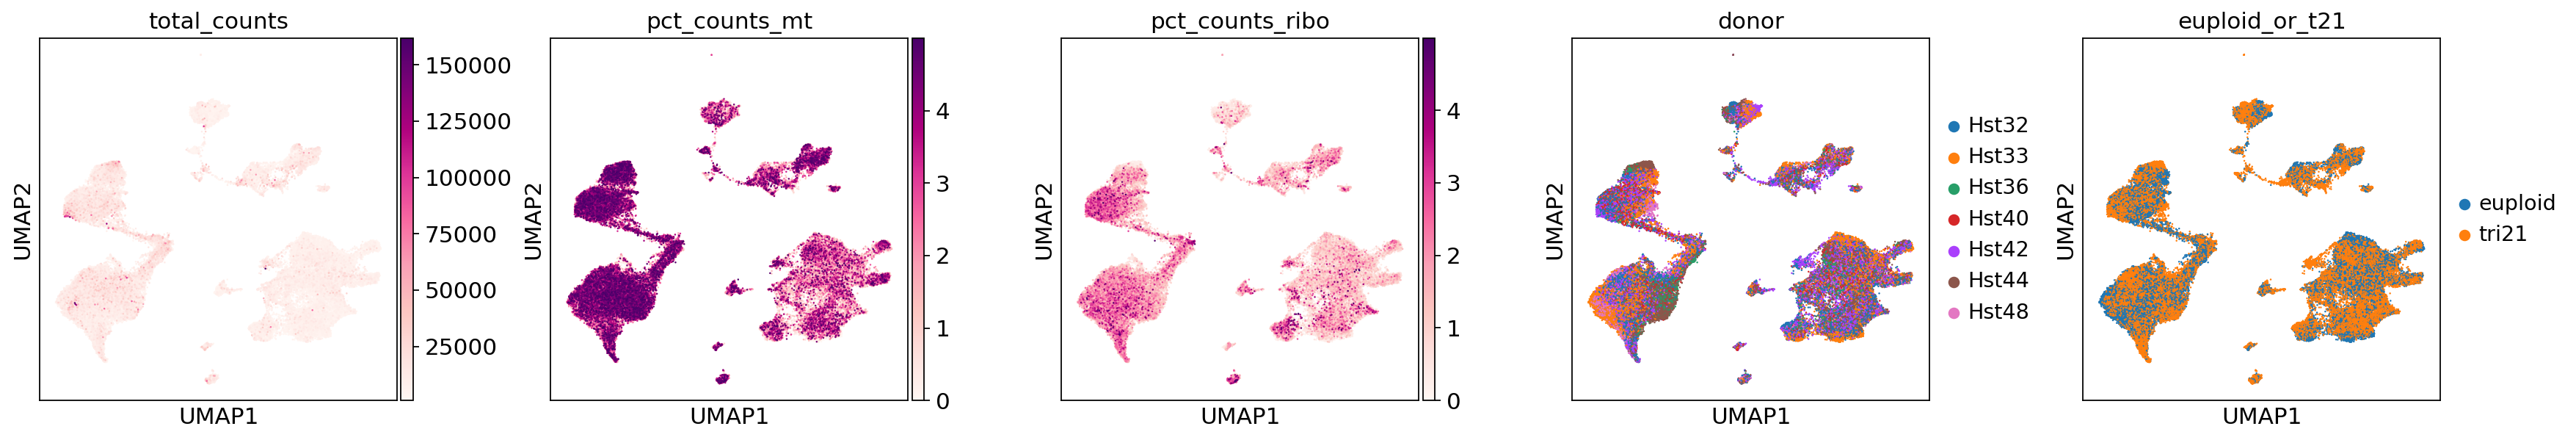

In [13]:
for latent_file_name in latent_file_name_list:
    latent_space_condition = latent_file_name.split('subsampled-per-cellstate-donor_')[1]
    print(f'##### {latent_space_condition} #####')
    sc.pp.neighbors(adata, use_rep=f'scVI_latent_{latent_space_condition}',n_neighbors=15)
    sc.tl.umap(adata, min_dist=0.2, spread=1.0)# 
    # check batches
    sc.pl.umap(adata, color=['total_counts','pct_counts_mt','pct_counts_ribo','donor','euploid_or_t21'], 
               size=5, wspace=0.3, ncols=6, components='all',cmap='RdPu')
    print('')
    print('')

* If you don't correct "donor" effect, aCM and vCM are not separated clearly. Which is strange since we don't expect common (atrial and ventricular) progenitors in this dataset/age (12-14 PCW).
* No significant difference between "only donor" and "donor and region"
* "layers-1" condition shows remained donor effect (especially Hst33)
<br>
<br>
--> will go with "correcting-donor-region_n-layers-2"